In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir('C:\\Users\\Administrator\\Desktop\\ml_ipynb\\ex3')
	print(os.getcwd())
except:
    print(os.getcwd()+" not changed!!!")



C:\Users\Administrator\Desktop\ml_ipynb\ex3


 # ex3_nn  - 神经网络部分

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
import scipy.optimize as opt
import sys
sys.path.append('..')
sys.path
from helper import formulas




 ### 1.1 加载数据

In [3]:
data = loadmat('ex3data1.mat')
#注意data是一个dict,键是X和y.
print(data)
#看看前面几行数据
X = data['X']
y = data['y'].ravel()
print(X.shape)
print(y.shape)



{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
(5000, 400)
(5000,)


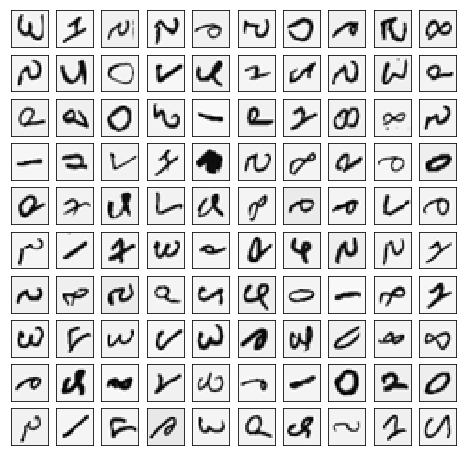

In [4]:
#绘图函数
def plot_an_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))


def plot_100_image(X):
    size = int(np.sqrt(X.shape[1]))

    # sample 100 image, reshape, reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]
    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))  
            #绘图函数，画100张图片


# pick_one = np.random.randint(0, 5000)
# plot_an_image(X[pick_one, :])
# plt.show()
# print('this should be {}'.format(y[pick_one]))
plot_100_image(X)
plt.show()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      


 ### 1.1 加载数据

In [5]:
data = loadmat('ex3data1.mat')
#注意data是一个dict,键是X和y.
print(data)
X = data['X']
y = data['y'].ravel()
print(X.shape)
print(y.shape)
print("--------")
parameters = loadmat('ex3weights.mat')
theta1 = parameters['Theta1']
theta2 = parameters['Theta2']








{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
(5000, 400)
(5000,)
--------


 ### 1.2 运行算法

In [6]:
# 首先初始化一些有用的变量
[m,n] = X.shape
print("m and n is:"+ str(m)+","+str(n))
print("Theta1 and Theta2 is:"+ str(theta1.shape)+","+str(theta2.shape))
# 一共有多少分类
num_lambels = 10
#为X增加一列1
X_save = X.copy
X= np.c_[np.zeros((m,1)),X]




m and n is:5000,400
Theta1 and Theta2 is:(25, 401),(10, 26)


 ### 1.2 运行算法

In [7]:
# tmp.shape = [5000 401] * [401 25] = [5000 25]
a2 = formulas.sigmoid(X @ theta1.T)
# 增加bias term,tmp.shape = [5000 26]
a3= np.c_[np.zeros((m,1)),a2]
# 计算最终结果,y_prob.shape = [5000 10]
a3 = formulas.sigmoid( a3 @ theta2.T )
# 注意一定要+1,因为这里的下标从0开始!!!
y_pred =np.argmax(a3,axis= 1) +1

# 准确度97%,比逻辑回归的还要高2个百分点
print('Train accuracy: {}'.format(np.mean(y == y_pred) * 100))



Train accuracy: 97.18


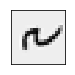

this should be 5,predcit is 5
this should be 5,predcit is 5
this should be 1,predcit is 1
this should be 5,predcit is 5
this should be 10,predcit is 10
this should be 5,predcit is 5
this should be 6,predcit is 6
this should be 10,predcit is 8
this should be 8,predcit is 8
this should be 9,predcit is 9


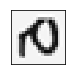

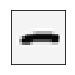

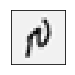

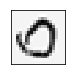

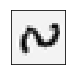

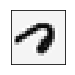

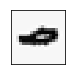

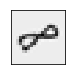

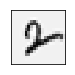

In [8]:
# 测试一下
#rp = np.random.permutation(range(m))
import time
for i in range(10):
    # randomly pick on sample
    pick_one = np.random.randint(0, 5000)
    sample = X[pick_one,:]
    actual_label = y[pick_one]
    #calculate the prediction
    prob = formulas.sigmoid( sample @ theta1.T)
    # 在0位置插入0元素
    prob = np.insert(prob,0,0)
    prob = formulas.sigmoid( prob @ theta2.T )
    pred = np.argmax(prob) +1
    # show the image
    plot_an_image(sample[1:])
    plt.show()
    time.sleep(1)
    print('this should be {},predcit is {}'.format(actual_label,pred))
  
    
